In [2]:
from google.colab import files
uploaded = files.upload()

Saving forecastable_expense_data_2024.csv to forecastable_expense_data_2024.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv('forecastable_expense_data_2024.csv')

# Preview the data
df.head()


,company_id,group_name,account_name,date,debit_amount,credit
0,7S4LET,Travel,Room Rent,13-03-2024,5919.08,NaN
1,7S4LET,Operations,Employee Benefits,14-08-2024,4070.23,NaN
2,7S4LET,Travel,Room Rent,17-08-2024,5689.68,NaN
3,7S4LET,Operations,Employee Benefits,03-06-2024,3843.45,NaN
4,7S4LET,Operations,Bank Service Charges,16-01-2024,2965.08,NaN


In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

# Load the CSV
df = pd.read_csv('forecastable_expense_data_2024.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Ensure numeric values and fill NaNs
df['debit_amount'] = pd.to_numeric(df['debit_amount'], errors='coerce').fillna(0)
df['credit'] = pd.to_numeric(df['credit'], errors='coerce').fillna(0)

# Subtract credit from debit to get actual spending
df['net_expense'] = df['debit_amount'] - df['credit']

# Set the date as the index
df.set_index('date', inplace=True)

# Resample to monthly sums
monthly_expense = df['net_expense'].resample('M').sum()

# Train-test split (e.g., 80% train, 20% test)
split_index = int(len(monthly_expense) * 0.8)
train_data = monthly_expense[:split_index].asfreq('ME').fillna(0)
test_data = monthly_expense[split_index:].asfreq('ME').fillna(0)

# ADF test on the training set
result = adfuller(train_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
df.head()


ADF Statistic: -4.186045575492843
p-value: 0.0006956688461484825


<ipython-input-5-21fe1a3756c9>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-5-21fe1a3756c9>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_expense = df['net_expense'].resample('M').sum()


,company_id,group_name,account_name,debit_amount,credit,net_expense
date,,,,,,
2024-03-13,7S4LET,Travel,Room Rent,5919.08,0.0,5919.08
2024-08-14,7S4LET,Operations,Employee Benefits,4070.23,0.0,4070.23
2024-08-17,7S4LET,Travel,Room Rent,5689.68,0.0,5689.68
2024-06-03,7S4LET,Operations,Employee Benefits,3843.45,0.0,3843.45
2024-01-16,7S4LET,Operations,Bank Service Charges,2965.08,0.0,2965.08


In [6]:
df = df[df['net_expense'] >= 0]
from scipy.stats import zscore
df['z'] = zscore(df['net_expense'])
df = df[df['z'].abs() < 3]  # Keep only values within 3 standard deviations
df.drop(columns='z', inplace=True)


In [7]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.24.4 pmdarima==2.0.4 --no-cache-dir

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 280.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 331.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

<ipython-input-2-53c67087e2ea>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('forecastable_expense_data_2024.csv', parse_dates=['date'])
<ipython-input-2-53c67087e2ea>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_expense = df['net_expense'].resample('M').sum()


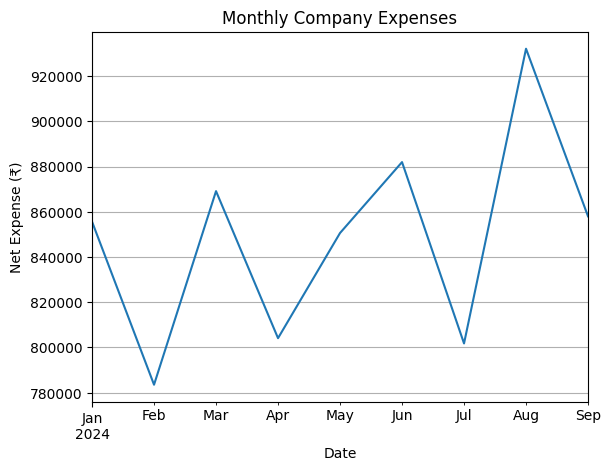

ADF Statistic: -4.186045575492843
p-value: 0.0006956688461484825
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=186.948, Time=0.95 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=212.774, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=210.732, Time=0.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=181.968, Time=0.76 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=183.263, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.29 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 9.231 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    7
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -86.984
Date:                Fri, 25 Apr 2025   AIC                            181.968
Time:                        09:29:11   BIC                            181.752
Sample:                    01-31-2024   HQIC                           179.294
                         - 07-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.003    337.683      0.000       0.994      

In [2]:
# Load and clean data
df = pd.read_csv('forecastable_expense_data_2024.csv', parse_dates=['date'])
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
df['debit_amount'] = pd.to_numeric(df['debit_amount'], errors='coerce').fillna(0)
df['credit'] = pd.to_numeric(df.get('credit', 0), errors='coerce').fillna(0)

# Compute net expense
df['net_expense'] = df['debit_amount'] - df['credit']

# Set date as index
df.set_index('date', inplace=True)

# Resample to monthly data
monthly_expense = df['net_expense'].resample('M').sum()

# Plot the time series
monthly_expense.plot(title="Monthly Company Expenses")
plt.ylabel("Net Expense (₹)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Train-test split (80% train, 20% test)
split_index = int(len(monthly_expense) * 0.8)
train_data = monthly_expense[:split_index]
test_data = monthly_expense[split_index:]

# ADF test on training set
result = adfuller(train_data)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Train auto_arima on train_data only
model = auto_arima(
    train_data,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Show model summary
print(model.summary())

In [3]:
import pandas as pd
import numpy as np

# Add date features
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.weekday
df['quarter'] = df.index.quarter
df['is_month_end'] = df.index.is_month_end
df['is_quarter_end'] = df.index.month.isin([3, 6, 9, 12])
df['is_half_year_end'] = df.index.month.isin([6, 12])
df['is_fy_end'] = df.index.month == 12

# Custom fiscal period
def fiscal_periods(date):
    fiscal_year = date.year
    fiscal_quarter = (date.month - 1) // 3 + 1
    fiscal_half = 1 if date.month <= 6 else 2
    return pd.Series([fiscal_year, fiscal_quarter, fiscal_half], index=['fiscal_year', 'fiscal_quarter', 'fiscal_half'])

df[['fiscal_year', 'fiscal_quarter', 'fiscal_half']] = df.index.to_series().apply(fiscal_periods)

# Add income flag
df['is_income'] = df['credit'] > 0

# Monthly transaction volume
df['transaction_volume'] = 1
# Grouped monthly data
monthly_df = df.groupby([pd.Grouper(freq='MS'), 'group_name', 'account_name']).agg({
    'net_expense': 'sum',
    'transaction_volume': 'sum',
    'is_income': 'sum'
}).reset_index()

# Create a helper to compute rolling + lag
def add_lag_features(group):
    group = group.sort_values('date')  # Ensure sorted by time
    group['lag_1'] = group['net_expense'].shift(1)
    group['lag_2'] = group['net_expense'].shift(2)
    group['rolling_mean_3'] = group['net_expense'].rolling(3).mean()
    group['rolling_std_3'] = group['net_expense'].rolling(3).std()
    return group

# Apply to each group_name + account_name
monthly_df = monthly_df.groupby(['group_name', 'account_name']).apply(add_lag_features).reset_index(drop=True)

<ipython-input-3-4b1bc502226f>:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_df = monthly_df.groupby(['group_name', 'account_name']).apply(add_lag_features).reset_index(drop=True)


In [7]:
# Example: Filter for "Operations" - "Bank Service Charges"
filtered_df = monthly_df[
    (monthly_df['group_name'] == 'Operations') &
    (monthly_df['account_name'] == 'Bank Service Charges')
].copy()

# Set date as index
filtered_df.set_index('date', inplace=True)

# Make sure index is sorted
filtered_df = filtered_df.sort_index()

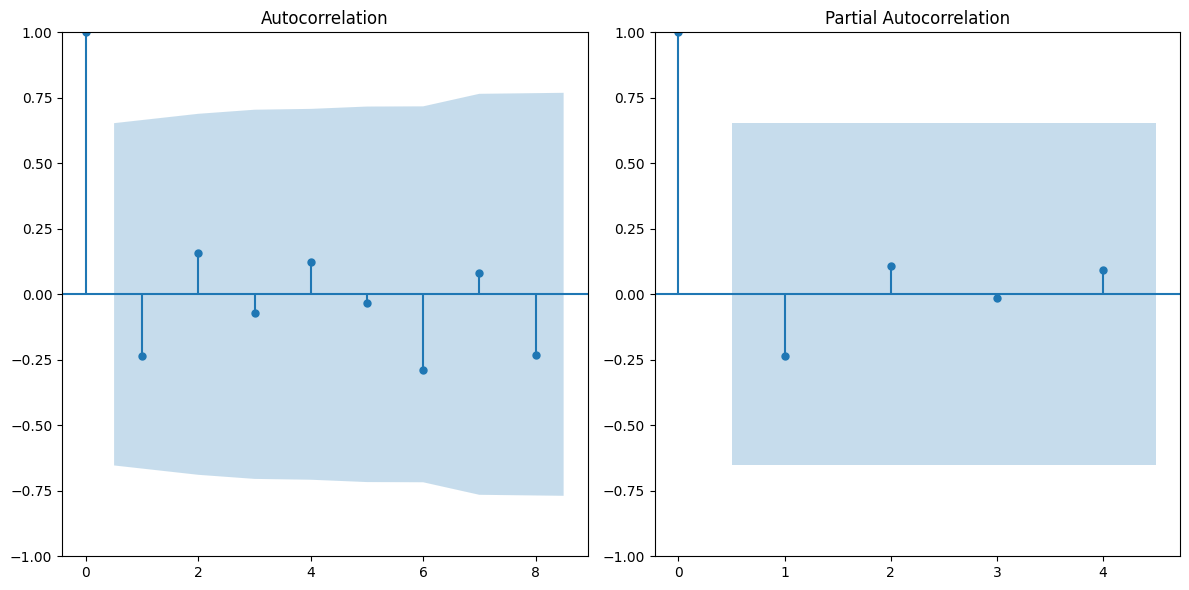

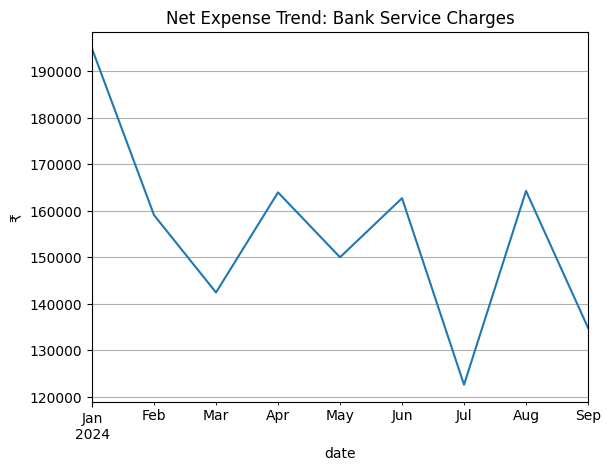

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Check if enough data points
n = len(filtered_df)
if n >= 5:  # ensure you have enough data
    plt.figure(figsize=(12, 6))

    # ACF Plot
    plt.subplot(121)
    plot_acf(filtered_df['net_expense'], ax=plt.gca(), lags=min(n-1, 20))

    # PACF Plot
    plt.subplot(122)
    plot_pacf(filtered_df['net_expense'], ax=plt.gca(), lags=min(n // 2, 10))

    plt.tight_layout()
    plt.show()

    # Trend Line
    filtered_df['net_expense'].plot(title=f"Net Expense Trend: {filtered_df['account_name'].iloc[0]}")
    plt.ylabel("₹")
    plt.grid(True)
    plt.show()
else:
    print("Not enough data points for ACF/PACF.")


In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMAX model with the chosen parameters
model = SARIMAX(
    filtered_df['net_expense'],
    order=(1, 0, 2),            # ARIMA part (p=1, d=1, q=1) Best model:  ARIMA(1,0,2)(0,0,0)[0]
    seasonal_order=(0, 0, 0, 0) # Seasonal part (P=1, D=1, Q=1, s=12 for yearly seasonality)
)

# Fit the model
results = model.fit()

# Print the model summary
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:            net_expense   No. Observations:                    9
Model:               SARIMAX(1, 0, 2)   Log Likelihood              -98013.018
Date:                Fri, 25 Apr 2025   AIC                         196034.036
Time:                        09:29:54   BIC                         196034.825
Sample:                    01-01-2024   HQIC                        196032.333
                         - 09-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999   5.19e-08   1.93e+07      0.000       1.000       1.000
ma.L1         -1.5539   1.99e-05   -7.8e+04      0.000      -1.554      -1.554
ma.L2          0.9998   2.07e-05   4.83e+04      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
# Forecast for the next 3 months
monthly_forecast = results.forecast(steps=1)
print("Monthly Forecast for Next Month:", monthly_forecast)

Monthly Forecast for Next Month: 2024-10-01    142987.908653
Freq: MS, dtype: float64


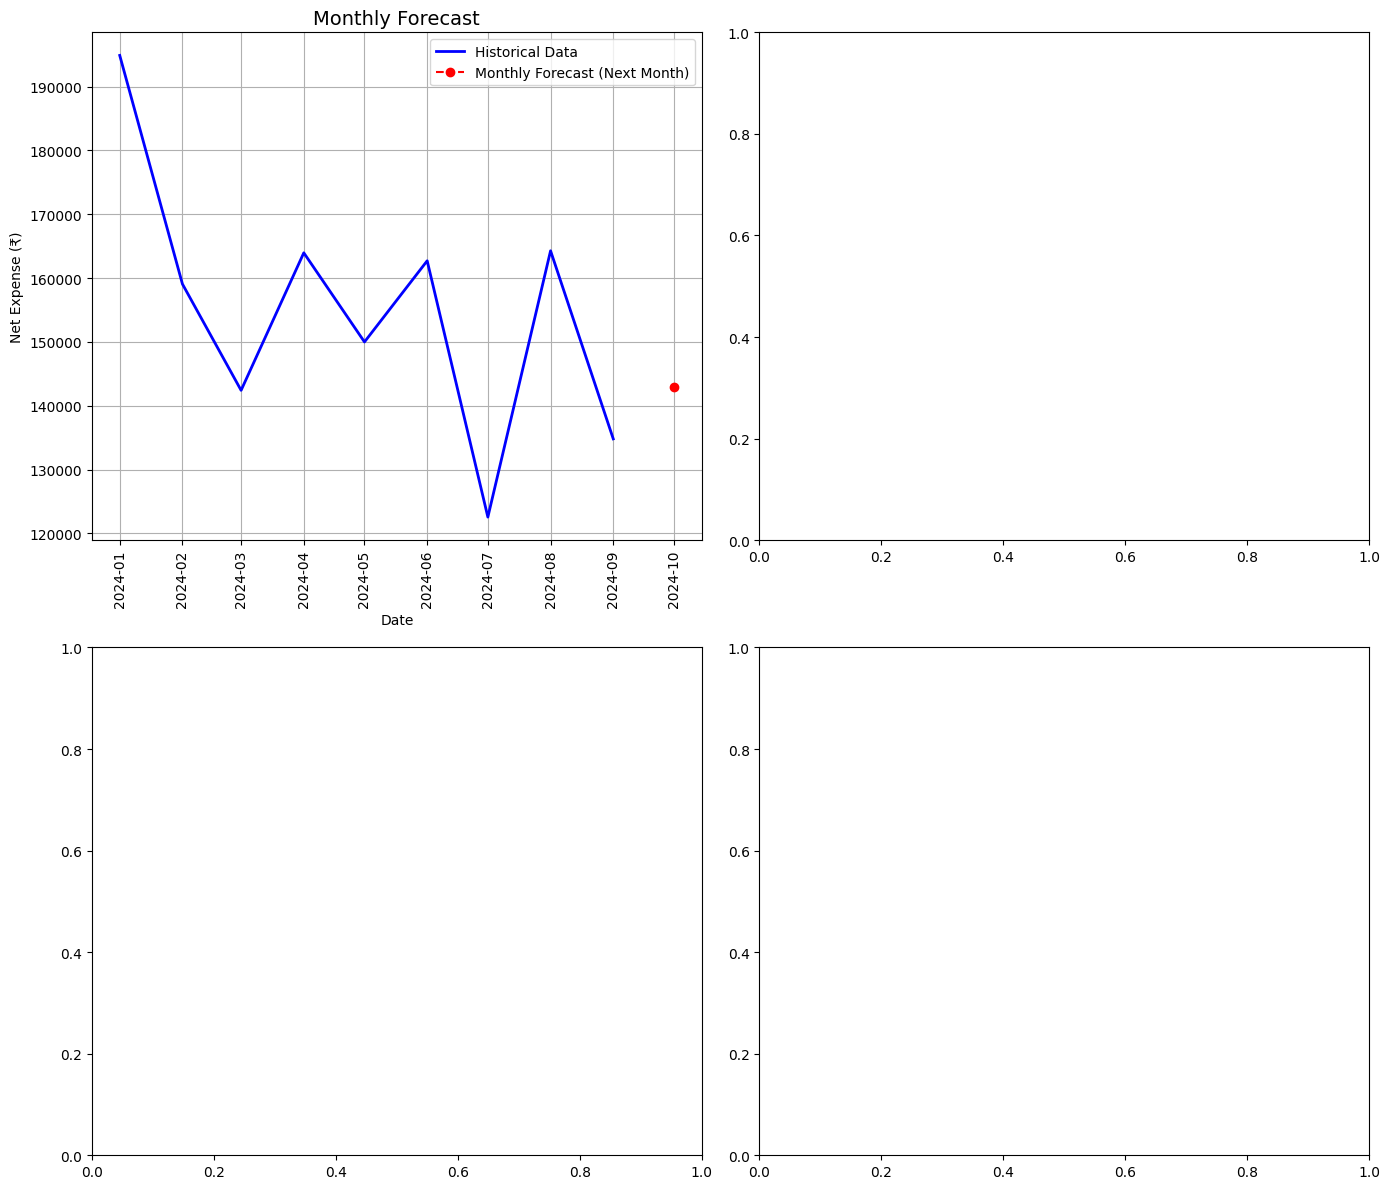

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Create forecast index for each forecast period
forecast_index_monthly = pd.date_range(start=filtered_df.index[-1], periods=2, freq='MS')[1:]

# Plot the detailed visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Monthly Forecast Plot
axes[0, 0].plot(filtered_df.index, filtered_df['net_expense'], label="Historical Data", color='blue', linewidth=2)
axes[0, 0].plot(forecast_index_monthly, monthly_forecast, label="Monthly Forecast (Next Month)", color='red', linestyle='--', marker='o')
axes[0, 0].set_title("Monthly Forecast", fontsize=14)
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Net Expense (₹)")
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
df = pd.read_csv('forecastable_expense_data_2024.csv', parse_dates=['date'], dayfirst=True)
df['debit_amount'] = pd.to_numeric(df['debit_amount'], errors='coerce').fillna(0)
df['credit'] = pd.to_numeric(df.get('credit', 0), errors='coerce').fillna(0)
df['net_expense'] = df['debit_amount'] - df['credit']

# Step 2: Monthly net expense time series
df.set_index('date', inplace=True)
monthly_expense = df['net_expense'].resample('ME').sum()

# Step 3: Train (Jan–Aug), Test (Sept)
train_data = monthly_expense[:'2024-08']
test_value = monthly_expense.loc['2024-09-30']  # Ensure it's scalar

# Step 4: SARIMAX param combos
orders = [(1, 0, 1), (1, 0, 2), (2, 0, 2)]
seasonal_orders = [(0, 0, 0, 0)]

best_score = float('inf')
best_model_params = None

# Step 5: Model search
for order in orders:
    for seasonal in seasonal_orders:
        try:
            model = SARIMAX(train_data, order=order, seasonal_order=seasonal)
            results = model.fit(disp=False)
            forecast = results.forecast(steps=1)
            forecast_value = forecast.iloc[0]

            mae = abs(test_value - forecast_value)

            if mae < best_score:
                best_score = mae
                best_model_params = (order, seasonal, forecast_value)

        except Exception as e:
            print(f"Error with model (Order={order}, Seasonal={seasonal}): {e}")

# Step 6: Evaluate final best model
if best_model_params:
    order, seasonal, forecast_value = best_model_params
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal)
    results = model.fit(disp=False)
    forecast = results.forecast(steps=1)
    forecast_value = forecast.iloc[0]

    difference = abs(test_value - forecast_value)
    accuracy = 100 - (difference / test_value * 100)

    print("Best SARIMA model:", f"Order={order}, Seasonal={seasonal}")
    print("Period\t\tForecasted\tActual\t\tDifference\tAccuracy")
    print(f"Sep 2024\t₹{forecast_value:,.2f}\t₹{test_value:,.2f}\t₹{difference:,.2f}\t{accuracy:.2f}%")
else:
    print("No valid model could be fit.")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Best SARIMA model: Order=(1, 0, 2), Seasonal=(0, 0, 0, 0)
Period		Forecasted	Actual		Difference	Accuracy
Sep 2024	₹846,297.20	₹857,980.48	₹11,683.28	98.64%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
df = pd.read_csv('forecastable_expense_data_2024.csv', parse_dates=['date'], dayfirst=True)
df['debit_amount'] = pd.to_numeric(df['debit_amount'], errors='coerce').fillna(0)
df['credit'] = pd.to_numeric(df.get('credit', 0), errors='coerce').fillna(0)
df['net_expense'] = df['debit_amount'] - df['credit']

# Step 2: Set index to date
df.set_index('date', inplace=True)

# Step 3: Define SARIMAX model selection and forecast
def sarimax_forecast(train_data, test_value, orders, seasonal_orders):
    best_score = float('inf')
    best_model_params = None
    for order in orders:
        for seasonal in seasonal_orders:
            try:
                model = SARIMAX(train_data, order=order, seasonal_order=seasonal)
                results = model.fit(disp=False)
                forecast = results.forecast(steps=1)
                forecast_value = forecast.iloc[0]
                mae = abs(test_value - forecast_value)
                if mae < best_score:
                    best_score = mae
                    best_model_params = (order, seasonal, forecast_value)
            except Exception as e:
                print(f"Error with model (Order={order}, Seasonal={seasonal}): {e}")
    return best_model_params

# Step 4: Set up SARIMAX parameters
orders = [(1, 0, 1), (1, 0, 2), (2, 0, 2)]
seasonal_orders = [(0, 0, 0, 0)]

# Step 5: Generate forecast per group_name + account_name
forecast_results = []
grouped = df.groupby(['group_name', 'account_name'])

for (group, account), sub_df in grouped:
    monthly_expense = sub_df['net_expense'].resample('ME').sum()
    train_data = monthly_expense[:'2024-08']
    test_value = monthly_expense.loc['2024-09-30'] if '2024-09-30' in monthly_expense.index else None

    if test_value is not None and not train_data.empty:
        best_model_params = sarimax_forecast(train_data, test_value, orders, seasonal_orders)
        if best_model_params:
            order, seasonal, forecast_value = best_model_params
            difference = forecast_value - test_value
            accuracy = 100 - (abs(difference) / test_value * 100)
            change_percent = (difference / test_value) * 100

            forecast_results.append({
                'Group': group,
                'Account Name': account,
                'Forecasted Value (₹)': round(forecast_value, 2),
                'Actual Value (₹)': round(test_value, 2),
                'Difference (₹)': round(difference, 2),
                'Change (%)': round(change_percent, 2),
                'Accuracy (%)': round(accuracy, 2)
            })

# Step 6: Final forecast result table
forecast_df = pd.DataFrame(forecast_results)

# Step 7: Display
if not forecast_df.empty:
    print(forecast_df)
else:
    print("No valid forecast data available for the selected date range.")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11

        Group           Account Name  Forecasted Value (₹)  Actual Value (₹)  \
0  Operations   Bank Service Charges             138161.87         134811.38   
1  Operations      Employee Benefits             261261.82         259398.10   
2      Travel  Miscellaneous Expense             157745.76         101851.29   
3      Travel              Room Rent             320695.17         361919.71   

   Difference (₹)  Change (%)  Accuracy (%)  
0         3350.49        2.49         97.51  
1         1863.72        0.72         99.28  
2        55894.47       54.88         45.12  
3       -41224.54      -11.39         88.61  


VISUALIZATION

In [16]:
import pandas as pd
import numpy as np

# Add date features
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.weekday
df['quarter'] = df.index.quarter
df['is_month_end'] = df.index.is_month_end
df['is_quarter_end'] = df.index.month.isin([3, 6, 9, 12])
df['is_half_year_end'] = df.index.month.isin([6, 12])
df['is_fy_end'] = df.index.month == 12

# Custom fiscal period
def fiscal_periods(date):
    fiscal_year = date.year
    fiscal_quarter = (date.month - 1) // 3 + 1
    fiscal_half = 1 if date.month <= 6 else 2
    return pd.Series([fiscal_year, fiscal_quarter, fiscal_half], index=['fiscal_year', 'fiscal_quarter', 'fiscal_half'])

df[['fiscal_year', 'fiscal_quarter', 'fiscal_half']] = df.index.to_series().apply(fiscal_periods)

# Add income flag
df['is_income'] = df['credit'] > 0

# Monthly transaction volume
df['transaction_volume'] = 1
# Grouped monthly data
monthly_df = df.groupby([pd.Grouper(freq='MS'), 'group_name', 'account_name']).agg({
    'net_expense': 'sum',
    'transaction_volume': 'sum',
    'is_income': 'sum'
}).reset_index()

# Create a helper to compute rolling + lag
def add_lag_features(group):
    group = group.sort_values('date')  # Ensure sorted by time
    group['lag_1'] = group['net_expense'].shift(1)
    group['lag_2'] = group['net_expense'].shift(2)
    group['rolling_mean_3'] = group['net_expense'].rolling(3).mean()
    group['rolling_std_3'] = group['net_expense'].rolling(3).std()
    return group

# Apply to each group_name + account_name
monthly_df = monthly_df.groupby(['group_name', 'account_name']).apply(add_lag_features).reset_index(drop=True)

<ipython-input-16-4b1bc502226f>:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_df = monthly_df.groupby(['group_name', 'account_name']).apply(add_lag_features).reset_index(drop=True)


In [19]:
import pandas as pd
import plotly.express as px

# Load data
df = pd.read_csv('forecastable_expense_data_2024.csv', parse_dates=['date'], dayfirst=True)
df['debit_amount'] = pd.to_numeric(df['debit_amount'], errors='coerce').fillna(0)
df['credit'] = pd.to_numeric(df.get('credit', 0), errors='coerce').fillna(0)
df['net_expense'] = df['debit_amount'] - df['credit']

# Group total net_expense by group_name
group_expense = df.groupby('group_name')['net_expense'].sum().reset_index()

# Treemap plot
fig = px.treemap(group_expense, path=['group_name'], values='net_expense',
                 color='net_expense', color_continuous_scale='RdBu',
                 title='Expense Distribution by Category (group_name)')
fig.show()


In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objs as go

# Load and preprocess
df = pd.read_csv('forecastable_expense_data_2024.csv', parse_dates=['date'], dayfirst=True)
df['debit_amount'] = pd.to_numeric(df['debit_amount'], errors='coerce').fillna(0)
df['credit'] = pd.to_numeric(df.get('credit', 0), errors='coerce').fillna(0)
df['net_expense'] = df['debit_amount'] - df['credit']
df.set_index('date', inplace=True)

# Monthly net_expense
monthly_expense = df['net_expense'].resample('MS').sum()

# Forecast next 3 months
train_data = monthly_expense[:'2024-09']
model = SARIMAX(train_data, order=(1,0,1), seasonal_order=(0,0,0,0))
results = model.fit(disp=False)
forecast = results.forecast(steps=3)

# Assume a static monthly income of ₹10,000 for simplicity
income_assumption = 10000
forecast_income = pd.Series([income_assumption] * 3, index=forecast.index)

# Project cash flow
cash_flow = income_assumption - monthly_expense
cumulative_cash = cash_flow.cumsum()
forecast_cash = income_assumption - forecast
forecast_cumulative = cumulative_cash.iloc[-1] + forecast_cash.cumsum()

# Visualization
fig = go.Figure()

# Actual cash
fig.add_trace(go.Scatter(x=cumulative_cash.index, y=cumulative_cash, mode='lines+markers',
                         name='Actual Cumulative Cash'))

# Forecast cash
fig.add_trace(go.Scatter(x=forecast_cumulative.index, y=forecast_cumulative, mode='lines+markers',
                         name='Forecast Cumulative Cash', line=dict(dash='dash')))

fig.update_layout(title='Quarter-End Cash Flow Projection',
                  xaxis_title='Month',
                  yaxis_title='Cumulative Cash (₹)',
                  template='plotly_white')
fig.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

